# Multilinear Regression

# Startup Dataset

In [1]:
# import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
# load the Startup_50 data
startup = pd.read_csv("/Users/Admin/Documents/data science assignment/multiple linear regression/50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Cleaning

In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
#check for missing values
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [45]:
startup.shape

(50, 5)

# Scatter plot Between the Variables along with Histrogram

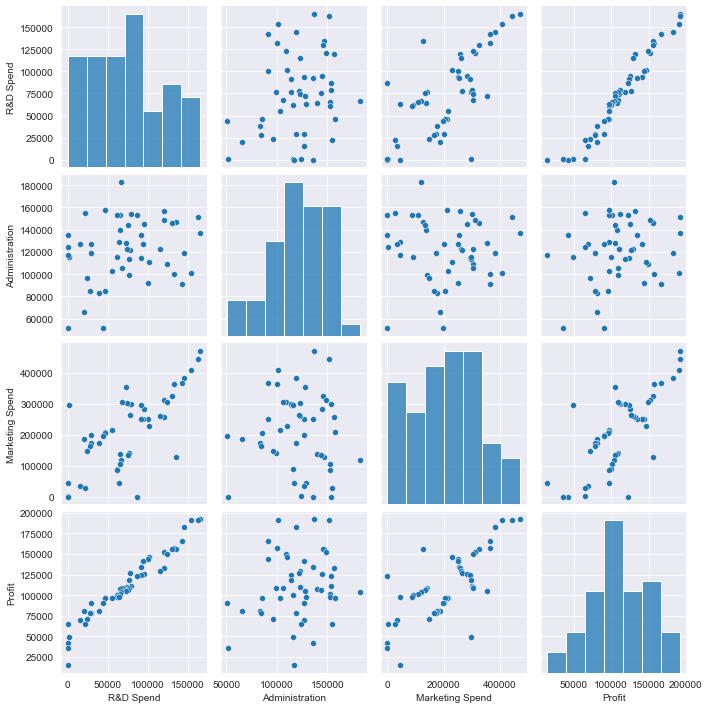

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

# Preparing Model

In [8]:
#rename dataset
startup = startup.rename(columns = {'State': 'S', 'R&D Spend': 'R', 'Administration': 'A', 'Marketing Spend': 'M', 'Profit': 'P'}, inplace = False)

In [9]:
#correlation matrix
startup.corr()

,R,A,M,P
R,1.000000,0.241955,0.724248,0.972900
A,0.241955,1.000000,-0.032154,0.200717
M,0.724248,-0.032154,1.000000,0.747766
P,0.972900,0.200717,0.747766,1.000000


In [10]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('P~R+A+M',data=startup).fit()

In [11]:
#Coefficients
model.params

Intercept    50122.192990
R                0.805715
A               -0.026816
M                0.027228
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
R            17.846374
A            -0.525507
M             1.655077
dtype: float64 
 Intercept    1.057379e-09
R            2.634968e-22
A            6.017551e-01
M            1.047168e-01
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           4.53e-30
Time:                        18:33:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R              0.8057      0.045     17.846      0.000       0.715       0.897
A             -0.0268      0.051     -0.526      0.602      -0.130       0.076
M              0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  P-values for Administator,Marketing Spend are more than 0.05 . 


# Simple Linear Regression

In [15]:
# Preparing model based only on Administator
ml_a=smf.ols('P~A',data = startup).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept    3.040044
A            1.419493
dtype: float64 
 Intercept    0.003824
A            0.162217
dtype: float64


In [16]:
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 24 Apr 2021   Prob (F-statistic):              0.162
Time:                        18:39:17   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
A              0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Here P-value of Administration is more than 0.05. so it's insignificant value.

In [17]:
# Preparing model based only on M 
ml_m=smf.ols('P~M',data = startup).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept    7.808356
M            7.802657
dtype: float64 
 Intercept    4.294735e-10
M            4.381073e-10
dtype: float64


In [18]:
ml_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        18:50:42   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
M              0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Here P-value of Marketing Spend is less then 0.05. So it's significant Vaule.

In [21]:
# Preparing model based only on Administator and Marketing spend
ml_am=smf.ols('P~A+M',data = startup).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues)  

Intercept    1.142741
A            2.467779
M            8.281039
dtype: float64 
 Intercept    2.589341e-01
A            1.729198e-02
M            9.727245e-11
dtype: float64


In [22]:
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           2.50e-10
Time:                        19:03:25   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
A              0.3237      0.131      2.468      0.017       0.060       0.588
M              0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Administator and Marketing Spend of coefficients p-value is less then 0.05 so it's became significant. 

# Calculating VIF

In [23]:
#calculating VIF value

rsq_r = smf.ols('R~A+M+P',data=startup).fit().rsquared  
vif_r = 1/(1-rsq_r) 

rsq_a = smf.ols('A~M+P+R',data=startup).fit().rsquared  
vif_a = 1/(1-rsq_a) 

rsq_m = smf.ols('M~P+R+A',data=startup).fit().rsquared  
vif_m = 1/(1-rsq_m) 

rsq_p = smf.ols('P~R+A+M',data=startup).fit().rsquared  
vif_p = 1/(1-rsq_p)

# Storing vif values in a data frame
d1 = {'Variables':['R','A','M','P'],'VIF':[vif_r,vif_a,vif_m,vif_p]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R,19.563001
1,A,1.182146
2,M,2.465332
3,P,20.302917


# Residual  Analaysis

# Test for Normality of Residual (Q-Q plot)

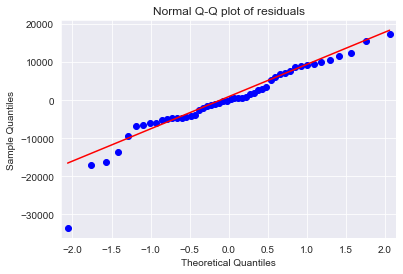

In [24]:
# Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [26]:
list(np.where(model.resid>17000))

[array([45], dtype=int64)]

# Residual plot for Homoscedasticity 

In [27]:
# Residual plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

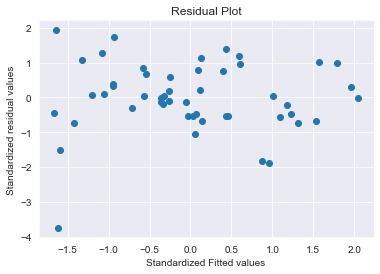

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regression

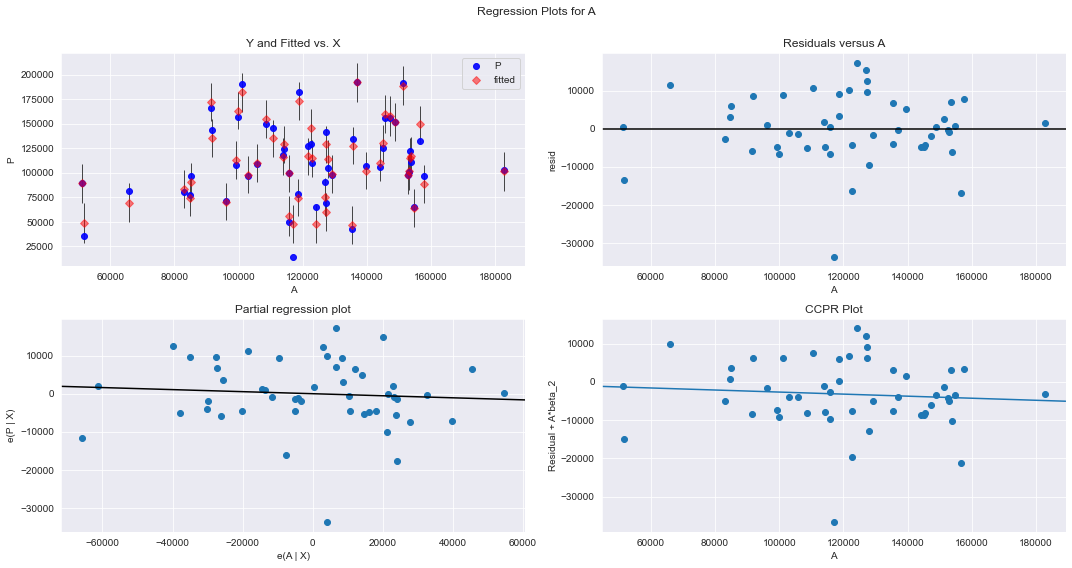

In [29]:
# Residual vs Regression
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "A", fig=fig)
plt.show()

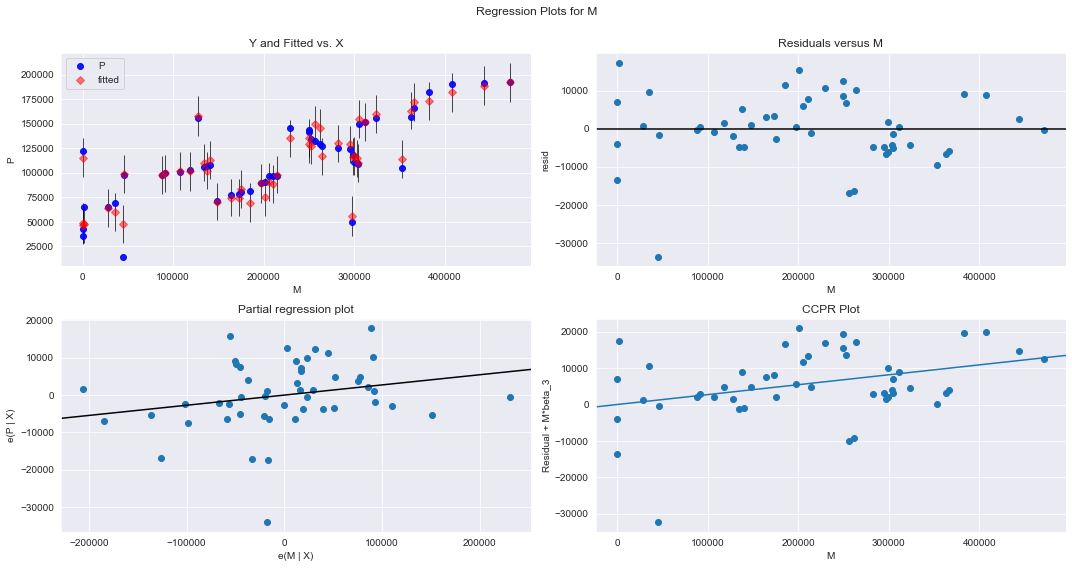

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "M", fig=fig)
plt.show()

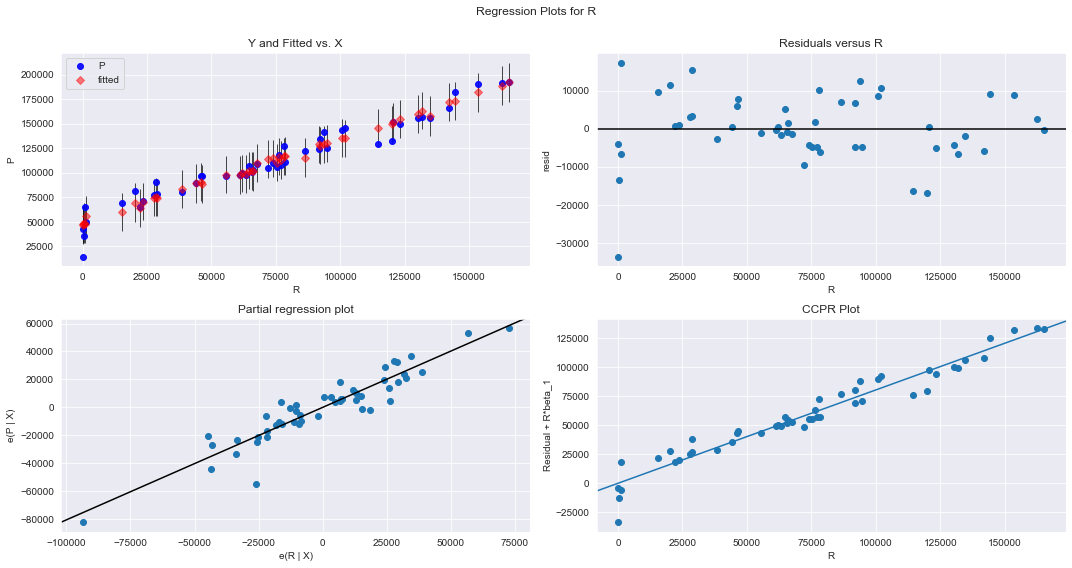

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook's Distance

In [32]:
# Cook's Distance/ outliers
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

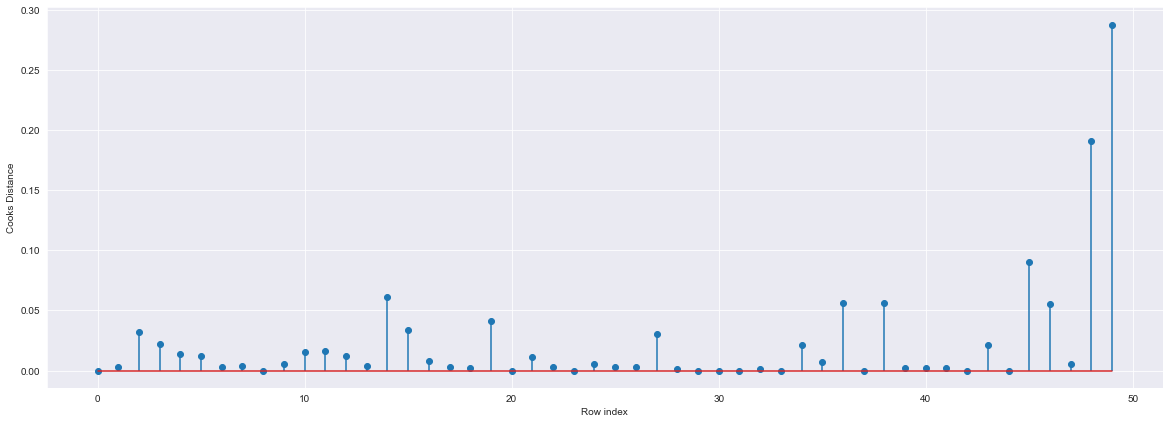

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence points

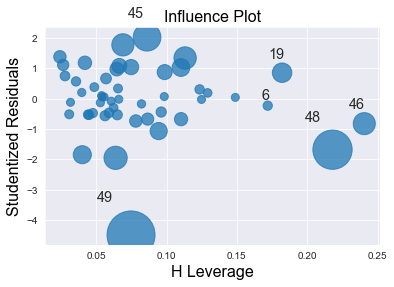

In [35]:
# High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that index data point 45 and 49  are high influencers so we can exclude that entire row

In [37]:
startup[startup.index.isin([45,49])]

,R,A,M,S,P
45,1000.23,124153.04,1903.93,New York,64926.08
49,0.00,116983.80,45173.06,California,14681.40


In [38]:
#See the differences in A and other variable values
startup.tail()

,R,A,M,S,P
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## Imporving the model 

In [39]:
#Load the data
startup_new = pd.read_csv("50_Startups.csv")

In [40]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup1=startup_new.drop(startup_new.index[[45,49]],axis=0).reset_index()

In [41]:
#Drop the original index
startup1=startup1.drop(['index'],axis=1)

In [42]:
startup1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
startup1.shape

(48, 5)

In [46]:
#rename dataset
startup1 = startup1.rename(columns = {'State': 'S', 'R&D Spend': 'R', 'Administration': 'A', 'Marketing Spend': 'M', 'Profit': 'P'}, inplace = False)

# Build Model

### Excluding Administration 

In [57]:
#Exclude variable "A" and generate R-Squared and AIC values
final_ml_A= smf.ols('P~R+M',data = startup1).fit()

In [48]:
(final_ml_A.rsquared,final_ml_A.aic)

(0.9630083732824323, 995.0259085667514)

#### Excepting Administration R-Squared value is 96%  and AIC is 995.

In [49]:
final_ml_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     585.7
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           6.06e-33
Time:                        19:37:48   Log-Likelihood:                -494.51
No. Observations:                  48   AIC:                             995.0
Df Residuals:                      45   BIC:                             1001.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.834e+04   2378.272     20.325      0.000    4.35e+04    5.31e+04
R              0.7812      0.034     22.949      0.000       0.713       0.850
M              0.0306      0.013      2.408      0.020       0.005       0.056
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.276
Skew:                          -0.119   Prob(JB):                        0.871
Kurtosis:                       2.716   Cond. No.                     5.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Confidence values 99%
print(final_ml_A.conf_int(0.01)) # 99% confidence level

                      0             1
Intercept  41941.356391  54734.483277
R              0.689678      0.872793
M             -0.003589      0.064877


### Excluding Marketing Spend 

In [54]:
#Exclude variable "M" and generate R-Squared and AIC values
final_ml_M= smf.ols('P~A+R',data = startup1).fit()

In [55]:
(final_ml_M.rsquared,final_ml_M.aic)

(0.9596782332232935, 999.1635018259686)

#### Excepting Marketing Spend R-Squared Value is 95% and AIC value is 999.

In [56]:
final_ml_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     535.5
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           4.21e-32
Time:                        19:47:49   Log-Likelihood:                -496.58
No. Observations:                  48   AIC:                             999.2
Df Residuals:                      45   BIC:                             1005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.633e+04   5002.521     11.260      0.000    4.63e+04    6.64e+04
A             -0.0519      0.041     -1.265      0.212      -0.134       0.031
R              0.8465      0.026     31.949      0.000       0.793       0.900
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.353
Skew:                          -0.202   Prob(JB):                        0.838
Kurtosis:                       3.118   Cond. No.                     6.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Comparing the both model  R-Square and AIC value, model 'final_ml_A' has high R-Square and low AIC value hence include variable 'Administration' so that multi collinearity problem would be resolved.

In [58]:
# Confidence values 99%
print(final_ml_M.conf_int(0.01)) # 99% confidence level

                      0             1
Intercept  42873.609008  69783.018304
A             -0.162192      0.058404
R              0.775284      0.917815


# Cook's Distance

In [59]:
model_influence_A = final_ml_A.get_influence()
(c_A, _) = model_influence_A.cooks_distance

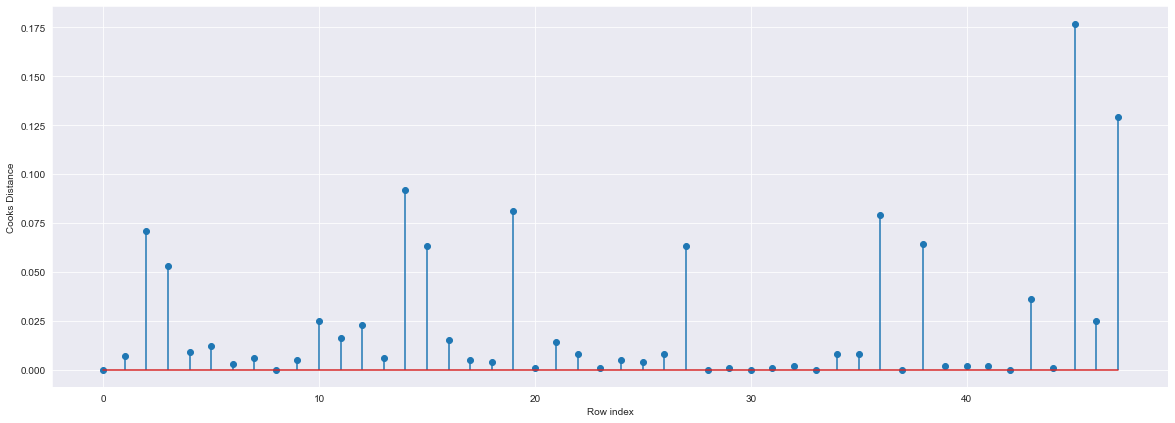

In [60]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_A,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [61]:
#index of the data points where c is more than .5
(np.argmax(c_A),np.max(c_A))

(45, 0.17722292337993012)

In [62]:
#Drop 45 and 47 observations
startup2=startup1.drop(startup1.index[[45,47]],axis=0)

In [63]:
startup2

,R,A,M,S,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [64]:
startup2.shape

(46, 5)

In [65]:
#Reset the index and re arrange the row values
startup3=startup2.reset_index()

In [66]:
startup4=startup3.drop(['index'],axis=1)

In [67]:
startup4

,R,A,M,S,P
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [68]:
#Build the model on the new data
final_ml_A= smf.ols('P~M+R',data = startup4).fit()

In [69]:
#Again check for influencers
model_influence_A = final_ml_A.get_influence()
(c_A, _) = model_influence_A.cooks_distance

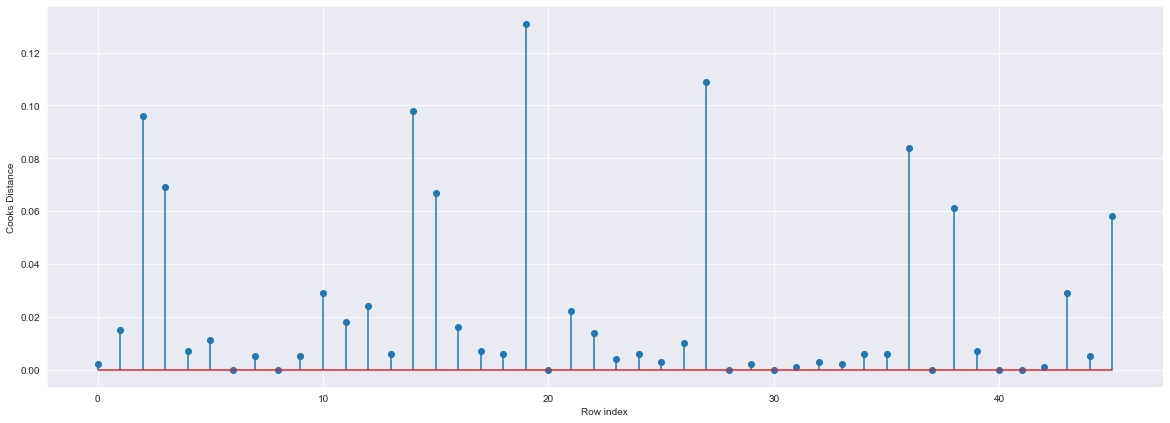

In [70]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup4)),np.round(c_A,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [71]:
#index of the data points where c is more than .5
(np.argmax(c_A),np.max(c_A))

(19, 0.1311526446834579)

#### Since the value is <1, we can stop the diagnostic process and finalize the model

In [72]:
#Check the accuracy of the mode
final_ml_A= smf.ols('P~A+M+R',data = startup4).fit()

In [73]:
(final_ml_A.rsquared,final_ml_A.aic)

(0.962593650298269, 950.0635928720131)

# Predicting for new data

In [74]:
#New data for prediction
new_data=pd.DataFrame({'R':165399.2,"A":136901.8,"M":471790.1},index=[1])

In [75]:
final_ml_A.predict(new_data)

1    190169.337502
dtype: float64

In [76]:
#rename dataset
startup_new = startup_new.rename(columns = {'State': 'S', 'R&D Spend': 'R', 'Administration': 'A', 'Marketing Spend': 'M', 'Profit': 'P'}, inplace = False)

In [77]:
final_ml_A.predict(startup_new.iloc[0:5,])

0    190130.816082
1    186454.033293
2    181105.940730
3    172478.455896
4    171731.889275
dtype: float64

In [78]:
pred_y = final_ml_A.predict(startup_new)

In [79]:
pred_y

0     190130.816082
1     186454.033293
2     181105.940730
3     172478.455896
4     171731.889275
5     163293.596350
6     156333.582943
7     158527.845161
8     150490.249670
9     154622.003463
10    135892.747070
11    136520.630139
12    129353.312991
13    127546.705225
14    148078.790426
15    145875.403771
16    117836.611892
17    129913.739743
18    129680.589848
19    115274.967305
20    117847.576718
21    117370.573803
22    115752.397504
23    111726.995236
24    114864.567380
25    103068.605246
26    110939.390996
27    115403.943556
28    101263.275850
29    102212.734351
30    101002.047454
31     98258.804621
32    100112.145051
33    100088.382611
34     90037.566390
35     93494.964961
36     77721.253491
37     93582.736764
38     74074.195105
39     87009.589892
40     77465.588069
41     78396.902643
42     74040.884976
43     62965.464205
44     66432.565336
45     51018.183229
46     59890.279108
47     49585.256517
48     54520.760435
49     51832.371084


#### The Prediction for Startup_dataset is predicted and  the random value of 'R&D Spend' =165399.2,"Administration":136901.8,"Marketing Spend":471790.1,'Weight'=1165 is given randomly and Profit is  obtained 15685.84 .

#### R-Squared value of the given Startup_dataset model is 96%. which means it's good model.

#### Multi linear regression first step is to import all the libraries and load the dataset of startup_50 and then do data cleaning for the given dataset.Next step is to do Data Visulization and then Prepare model for dataset with ols model with profit as output and input as Administration, Marketing Spend, R&D Spend. And then do simple linear regression for all the parameter and then find pvalue and rsquare for all the build model and calculate VIF. And to Residual Analaysis and then do Model Deletion Diagnostics for removing outliers. Next step is to do imporving the model by removing the high infulence data in the Sartup dataset(Marketing Spend) and do the step again for preparing model. Now Predict the model by giving random input for R&D spend and Administration and Marketing Spend and then find output for Profit. 